In [1]:
import os
import json
import cv2
import matplotlib.pyplot as plt


### Task 1: Load Images and Metadata from MiniBAGLS dataset


In [2]:
dataset_path = "./Mini_BAGLS_dataset"  
# storing metadata for each image
metadata_list = []

for i in range(100):
    metadata_file = os.path.join(dataset_path, f"{i}.meta")
    with open(metadata_file, 'r') as file:
        metadata = json.load(file)
        metadata_list.append(metadata)

#first5 metadata entries
metadata_list[:5]


[{'Video Id': 37,
  'Camera': 'KayPentax HSV 9710 (Photron)',
  'Sampling rate (Hz)': 4000,
  'Video resolution (px, HxW)': [512, 256],
  'Color': False,
  'Endoscope orientation': '70°',
  'Endoscope application': 'oral',
  'Age range (yrs)': '20-30',
  'Subject sex': 'w',
  'Subject disorder status': 'healthy',
  'Segmenter': 0,
  'Post-processed': 1},
 {'Video Id': 277,
  'Camera': 'KayPentax HSV 9710 (Photron)',
  'Sampling rate (Hz)': 4000,
  'Video resolution (px, HxW)': [512, 256],
  'Color': False,
  'Endoscope orientation': '70°',
  'Endoscope application': 'oral',
  'Age range (yrs)': '',
  'Subject sex': 'w',
  'Subject disorder status': 'healthy',
  'Segmenter': 0,
  'Post-processed': 1},
 {'Video Id': 313,
  'Camera': 'KayPentax HSV 9710 (Photron)',
  'Sampling rate (Hz)': 4000,
  'Video resolution (px, HxW)': [512, 256],
  'Color': False,
  'Endoscope orientation': '70°',
  'Endoscope application': 'oral',
  'Age range (yrs)': '20-30',
  'Subject sex': 'w',
  'Subject dis

## Plotting using Segmentation Masks

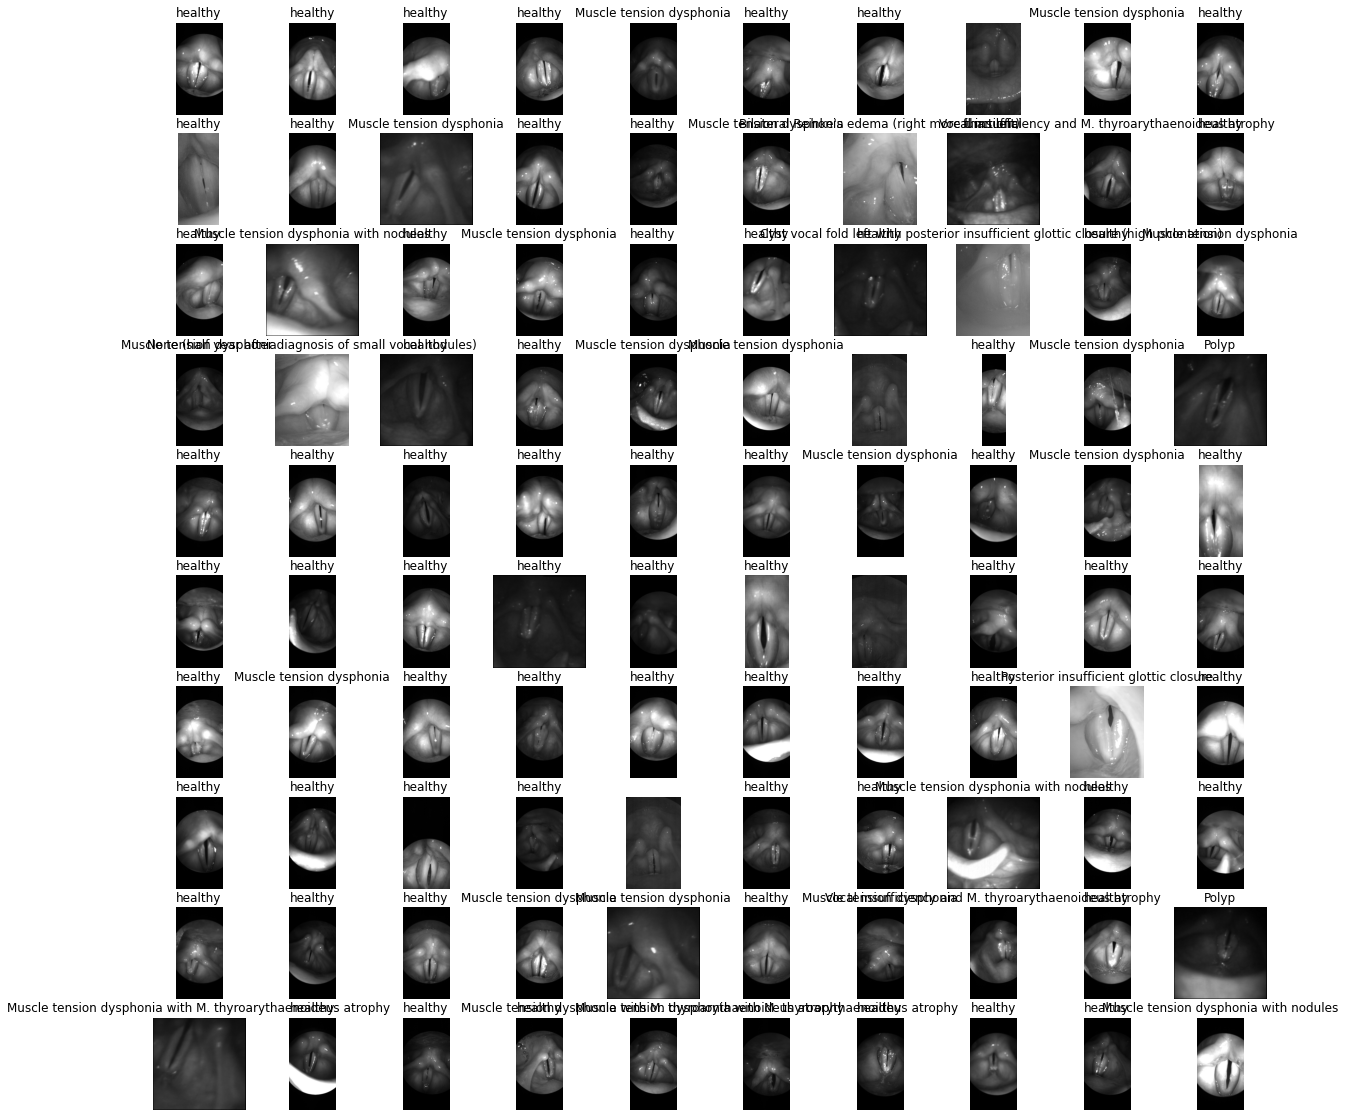

In [3]:
def read_metadata(meta_file):
    with open(meta_file, 'r') as file:
        metadata = json.load(file)
    return metadata

# Plotting images using segmentation masks
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    image_path = os.path.join(dataset_path, f"{i}.png")
    metadata = read_metadata(os.path.join(dataset_path, f"{i}.meta"))    
    image = cv2.imread(image_path)
    axs[i // 10, i % 10].imshow(image)
    axs[i // 10, i % 10].set_title(metadata["Subject disorder status"])
    axs[i // 10, i % 10].axis('off')

plt.show()


### RGB to grayscale for 1 image 

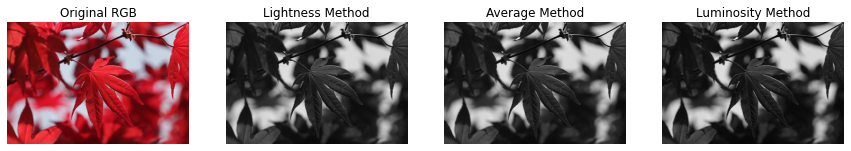

In [4]:
# Function to convert an RGB image to grayscale using different methods
def rgb_to_grayscale(image, method='average'):
    if method == 'lightness':
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    elif method == 'average':
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    elif method == 'luminosity':
        r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
        grayscale_image = 0.21 * r + 0.72 * g + 0.07 * b
    else:
        raise ValueError("Invalid method. Choose from 'lightness', 'average', or 'luminosity'.")
    return grayscale_image

# Load the "leaves.jpg" image
leaves_image_path = "leaves.jpg"  # Replace with the actual path
leaves_image = cv2.imread(leaves_image_path)

# Create a subplot for the three variants
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot the original RGB image
axs[0].imshow(cv2.cvtColor(leaves_image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original RGB")

# Perform RGB to Grayscale conversion using different methods
grayscale_lightness = rgb_to_grayscale(leaves_image, method='lightness')
grayscale_average = rgb_to_grayscale(leaves_image, method='average')
grayscale_luminosity = rgb_to_grayscale(leaves_image, method='luminosity')

# Plot the three variants side by side
axs[1].imshow(grayscale_lightness, cmap='gray')
axs[1].set_title("Lightness Method")

axs[2].imshow(grayscale_average, cmap='gray')
axs[2].set_title("Average Method")

axs[3].imshow(grayscale_luminosity, cmap='gray')
axs[3].set_title("Luminosity Method")

# Hide axes ticks and labels
for ax in axs:
    ax.axis('off')

# Display the plot
plt.show()


### Task 4 : 

#### Which method is better and why : 
The illumination method is generally preferred because it captures the sensitivity of the human eye to different color modes, resulting in a perceptually accurate grayscale image